In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# Véletlen séta

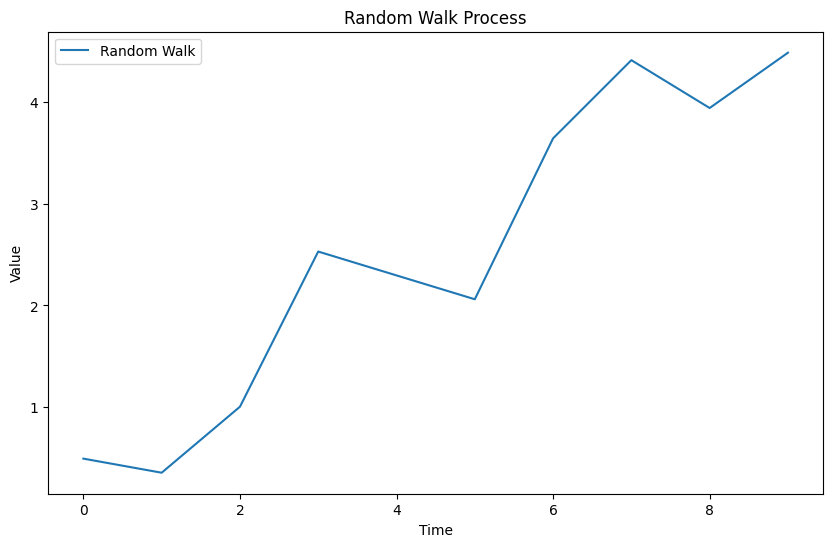

In [6]:
np.random.seed(42)
steps = 10
random_steps = np.random.normal(0, 1, steps)
random_walk = np.cumsum(random_steps) 

plt.figure(figsize=(10, 6))
plt.plot(random_walk, label="Random Walk")
plt.title("Random Walk Process")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

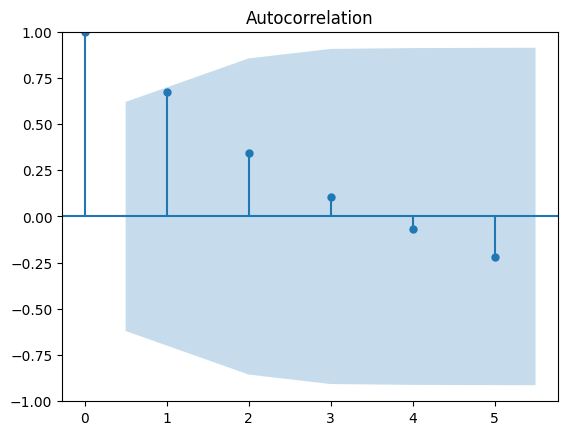

In [11]:
plot_acf(random_walk)
plt.show()

In [13]:
adfuller(random_walk)[1]  # ha szig. akkor stacionáriusnak tekinthető

0.9883086769896728

# Mozgóátlag folyamat

In [19]:
from statsmodels.tsa.arima_process import ArmaProcess

theta = 0.5
steps = 100
ma_coeff = np.array([1, theta]) 
ar_coeff = np.array([1]) 
ma_process = ArmaProcess(ar_coeff, ma_coeff).generate_sample(nsample=steps)

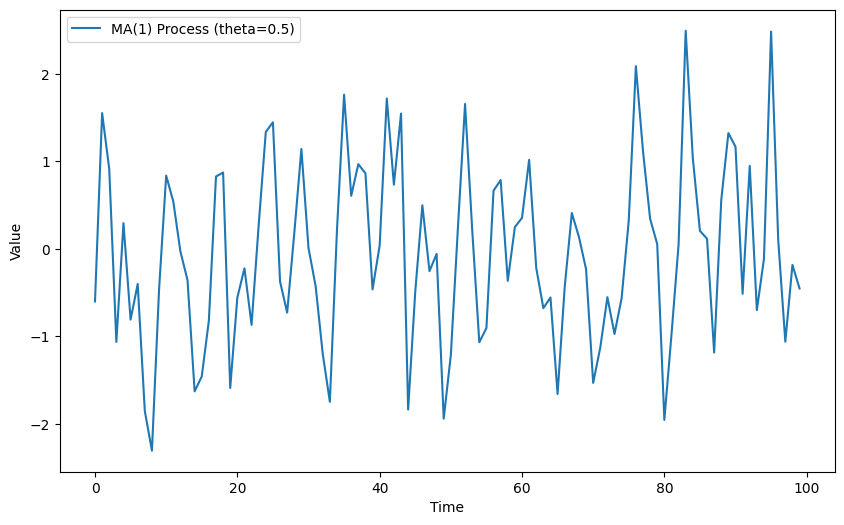

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(ma_process, label=f"MA(1) Process (theta={theta})")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

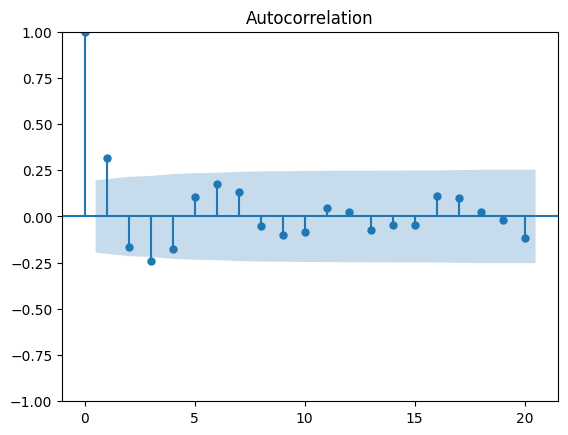

In [22]:
plot_acf(ma_process);

# Mozgoátlag modell

In [24]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ma_process, order=(0,0,1))
result = model.fit()
result.summary()
# Ljung-Box test: a reziduumok autokorrlációja szignifikánsan eltér-e a 0-tól, H0: Nincs autokorr.
# Jarque-Bera test: A reziduumok normális eloszlást követnek-e (nem feltétel, de ideális esetben igen, így pontosabb a becslés) H0: normális eloszlású

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -136.552
Date:                Tue, 19 Nov 2024   AIC                            279.104
Time:                        15:13:54   BIC                            286.920
Sample:                             0   HQIC                           282.267
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0514      0.141     -0.364      0.716      -0.328       0.225
ma.L1          0.4610      0.096      4.789      0.000       0.272       0.650
sigma2         0.8965      0.125      7.192      0.000       0.652       1.141
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.70   Prob(JB):                         0.98
Heteroskedasticity (H):               1.21   Skew:                             0.02
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""